In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import functional as F

import cv2
import os
import matplotlib.pyplot as plt
import random

import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow

random.seed(123)

In [11]:
# Download the model from GitHub
!wget https://github.com/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/raw/master/model_21_class_1000_images.pth

# Step 1: Define the model architecture
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=21)

# Step 2: Load saved weights
#model.load_state_dict(torch.load('model_21_class_1000_images.pth'))
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.load_state_dict(torch.load('model_21_class_1000_images.pth', map_location=device))

# Step 3: Switch to evaluation mode
model.eval()

if torch.cuda.is_available():
    model = model.cuda()

def detect_objects_in_image(image_path):
    # Load the model
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    num_classes = 21  # 20 classes + 1 background
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load('model_21_class_1000_images.pth', map_location=device))
    model.eval()  # Important: set the model to evaluation mode
    model = model.to(device)

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Get predictions
    with torch.no_grad():
        prediction = model(image_tensor)

    # Post-process the output (e.g., apply a confidence threshold)
    confidence_threshold = 0.5
    pred_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
    pred_labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
    labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

    # Create a dictionary to map label indices to class names (VOC class names)
    label_to_name = {
        0: "background",
        1: "aeroplane", 2: "bicycle", 3: "bird", 4: "boat",
        5: "bottle", 6: "bus", 7: "car", 8: "cat", 9: "chair",
        10: "cow", 11: "diningtable", 12: "dog", 13: "horse",
        14: "motorbike", 15: "person", 16: "pottedplant",
        17: "sheep", 18: "sofa", 19: "train", 20: "tvmonitor"
    }

    # Visualize the results
    for box, label in zip(pred_boxes, pred_labels):
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
        class_name = label_to_name[label]
        cv2.putText(image, class_name, (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    image_display = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

--2023-10-15 10:10:38--  https://github.com/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/raw/master/model_21_class_1000_images.pth
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/master/model_21_class_1000_images.pth [following]
--2023-10-15 10:10:38--  https://media.githubusercontent.com/media/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/master/model_21_class_1000_images.pth
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166122110 (158M) [application/octet-stream]
Saving to: ‘model_21_class_1000_images.pth.3’

model_21_class_1000 100%[=

--2023-10-15 10:10:41--  https://github.com/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/raw/master/photos/dog-photo.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/master/photos/dog-photo.jpg [following]
--2023-10-15 10:10:41--  https://raw.githubusercontent.com/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/master/photos/dog-photo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121984 (119K) [image/jpeg]
Saving to: ‘dog-photo.jpg.3’

dog-photo.jpg.3     100%[===================>] 119.12K  --.-KB/s    in 0.03s   

2023-10-15 10:10:41 (4.31 MB/s) -

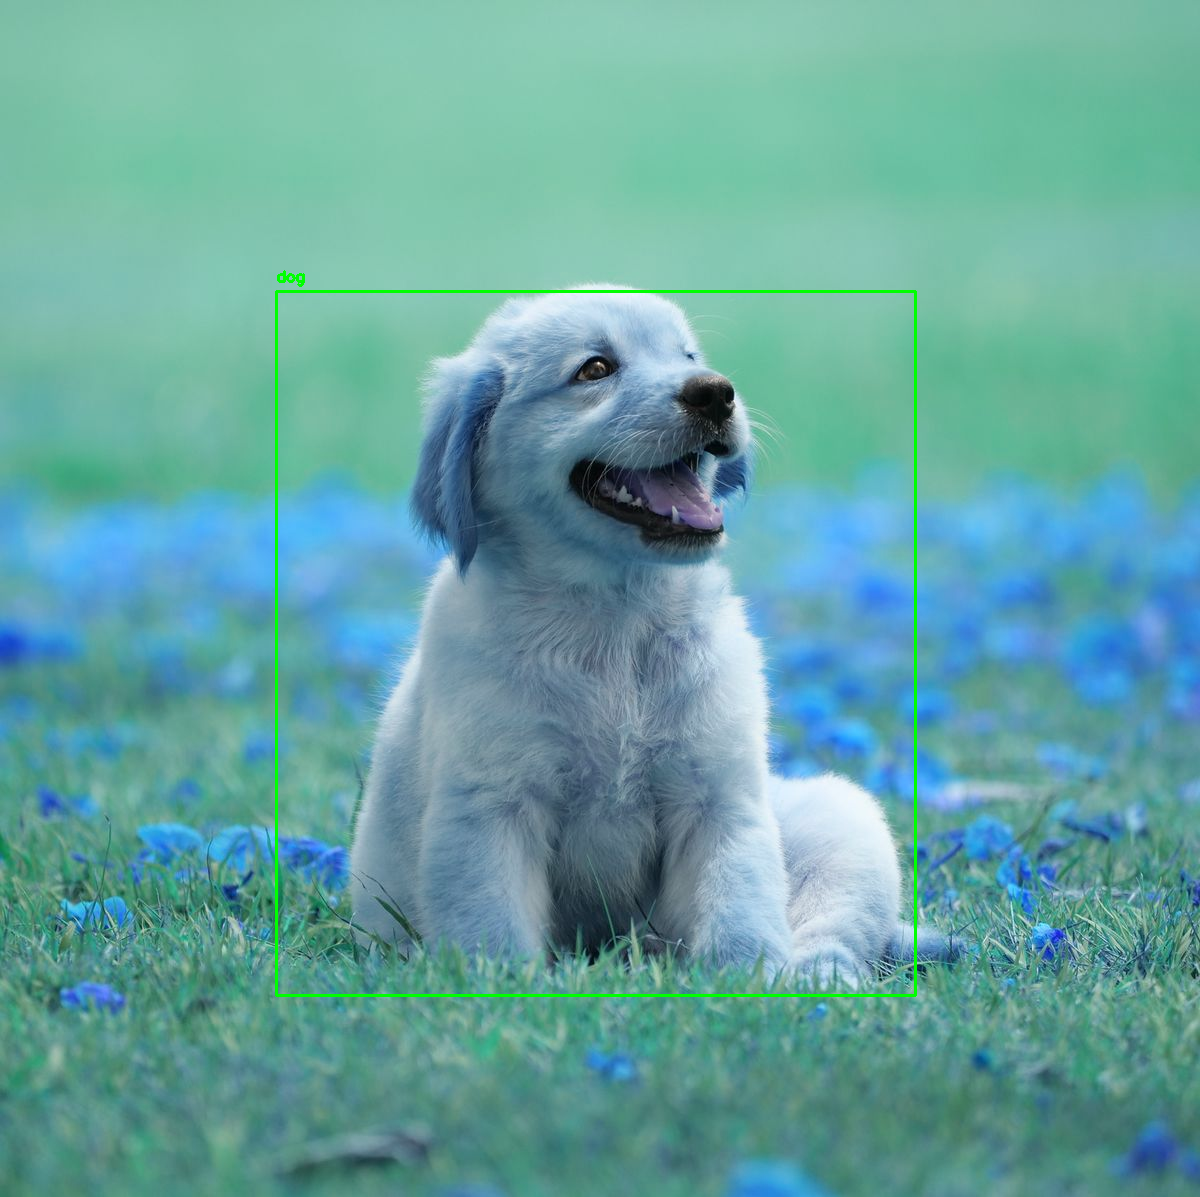

In [12]:
!wget https://github.com/M1kE01/Dog-detector-with-OpenCV-and-PyTorch/raw/master/photos/dog-photo.jpg

detect_objects_in_image('dog-photo.jpg')